#Churn DA Kaggle

In [3]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading data
from google.colab import drive
# Authenticate and mount Google Drive
drive.mount('/content/drive')
CR_data=pd.read_csv('/content/drive/MyDrive/churn-bigml-20.csv')

Mounted at /content/drive


In [3]:
#Data Info
CR_data.tail(5)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
666,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [5]:
#Chrking null values
CR_data.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [6]:
#Cheking some descriptive statistics with the data
CR_data.describe()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [7]:
#Dropping duplicate if any
#Dropping Duplicate values
CR_data.drop_duplicates(keep="first", inplace = True)
CR_data.duplicated().sum()

0

In [6]:
#Checking the datatype
CR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

<ipython-input-8-82a6f8ceb209>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(CR_data[i])
<ipython-input-8-82a6f8ceb209>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(CR_data[i])
<ipython-input-8-82a6f8ceb209>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in s

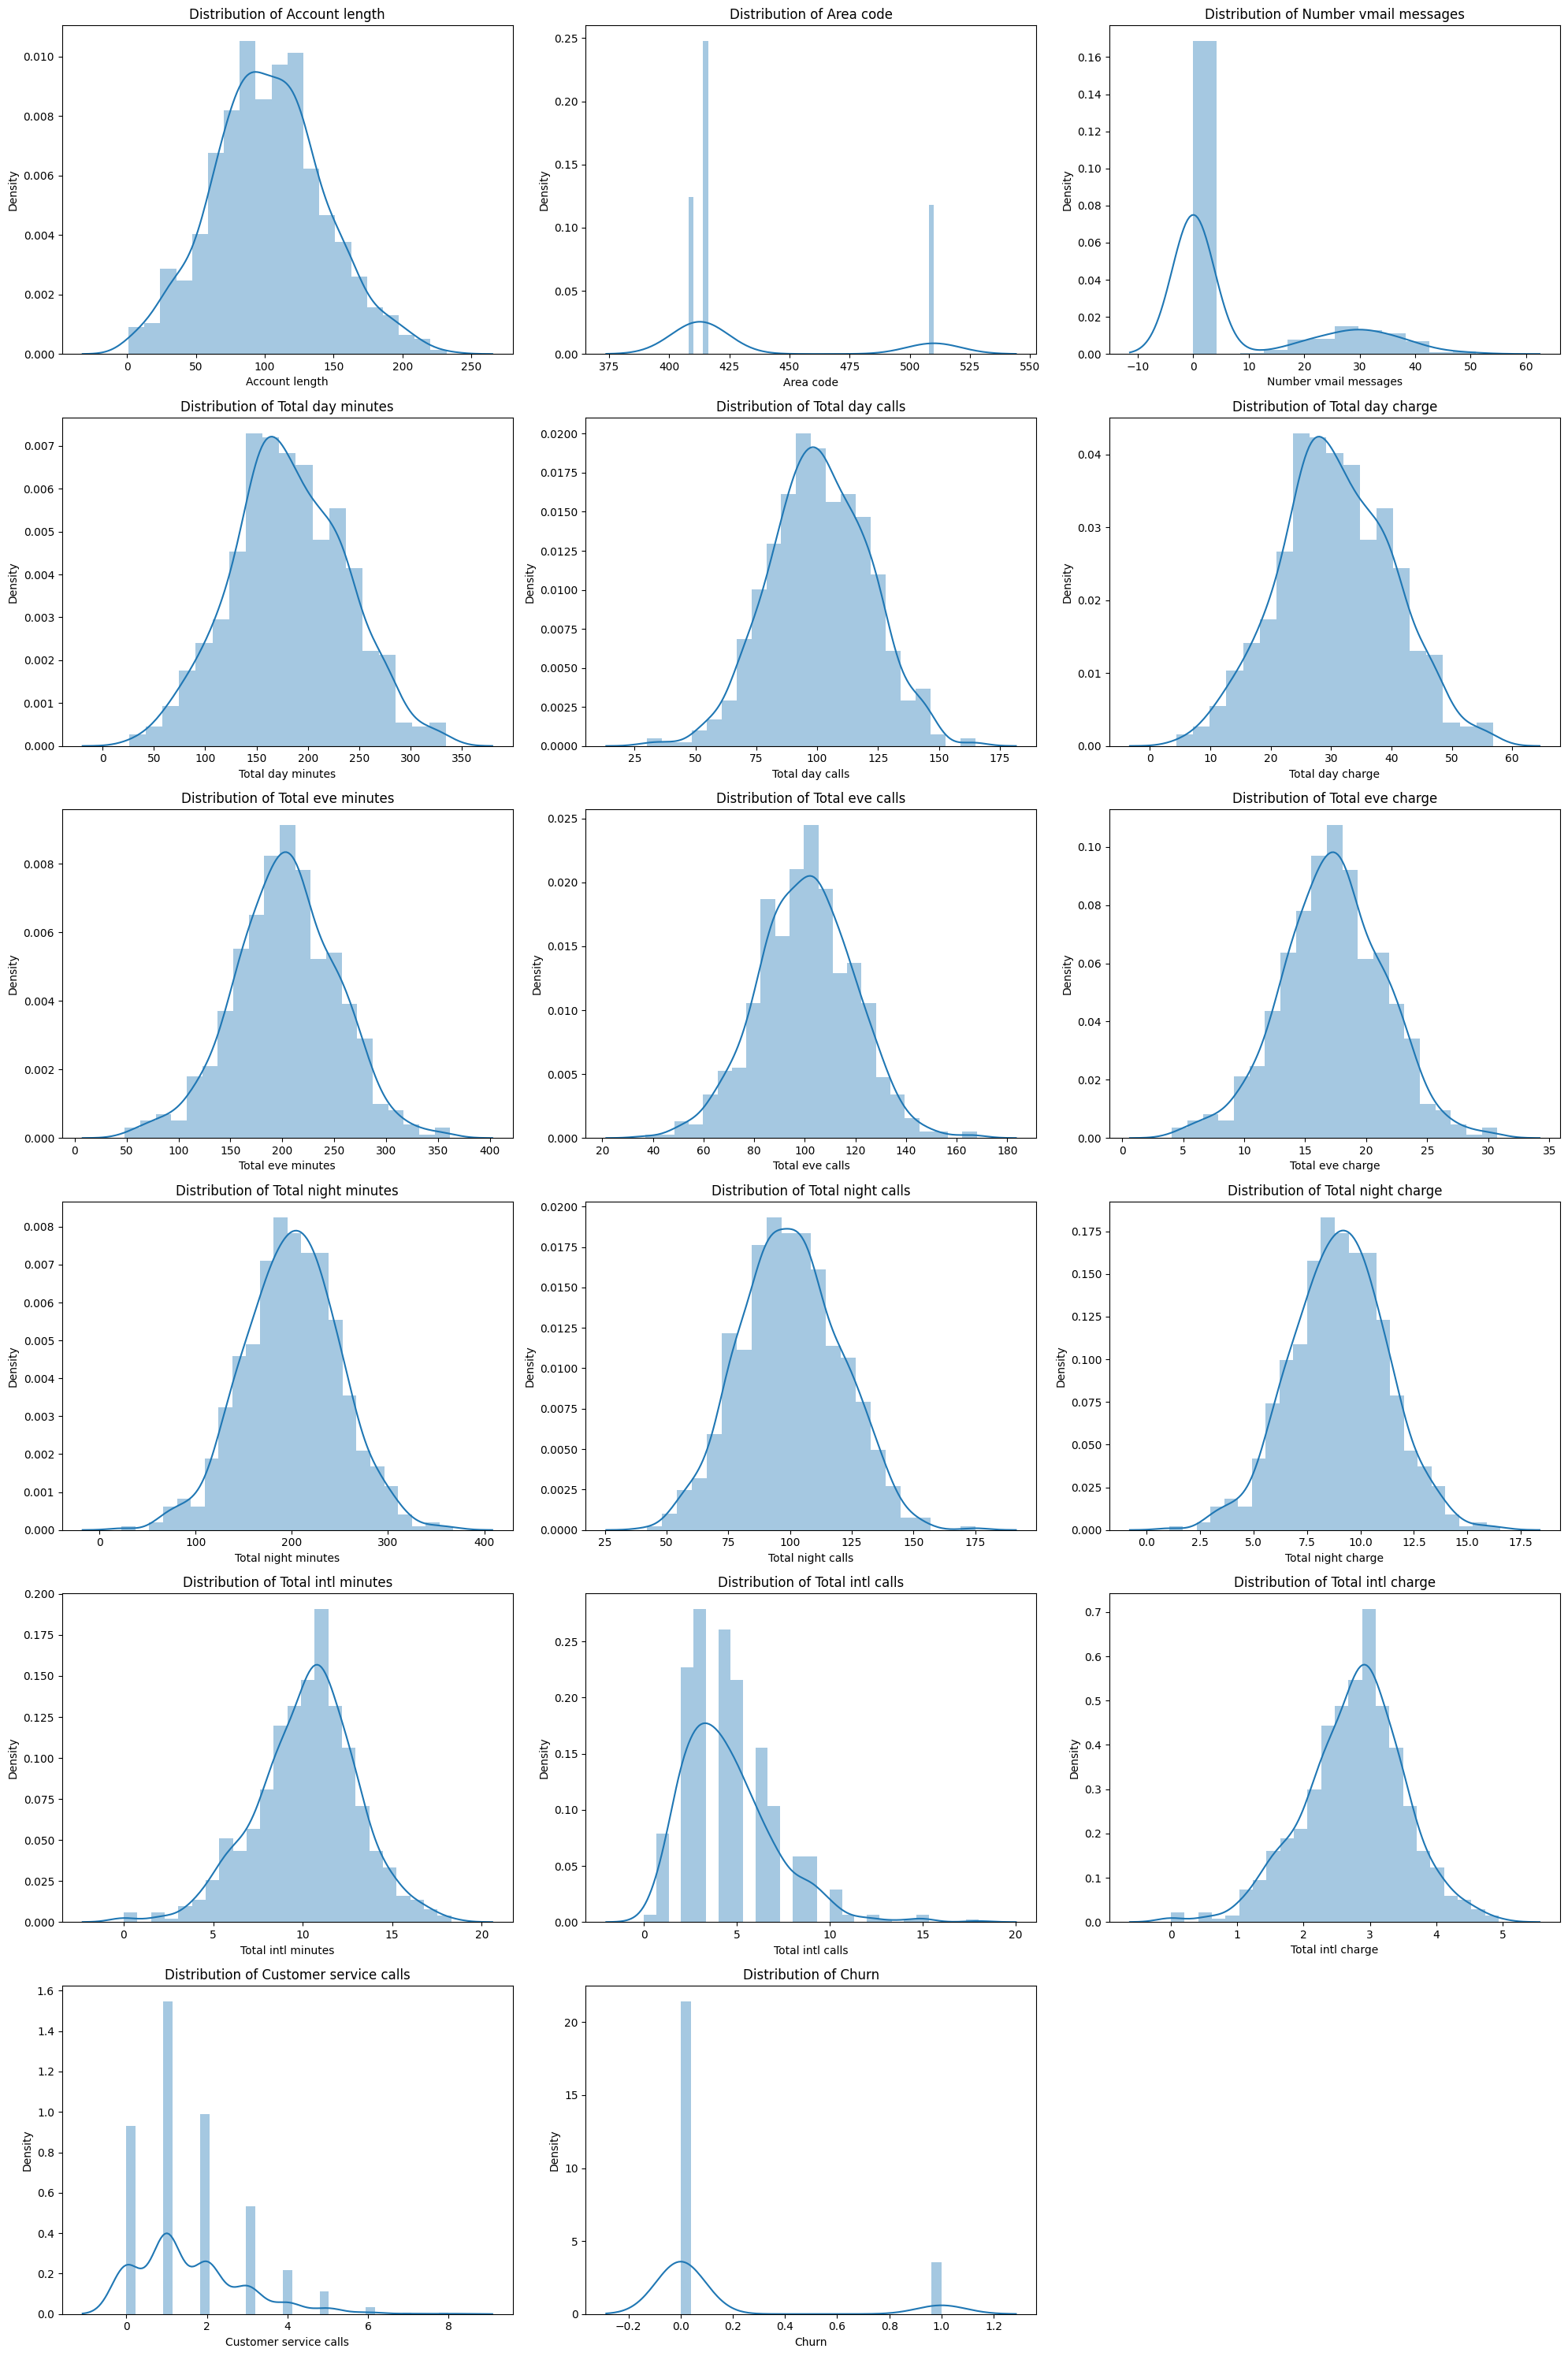

In [8]:
#Plotting all the numerical columns to see the distribution
numeric_features=[x for x in CR_data.columns if CR_data[x].dtype!='object']
Categorical_features=[x for x in CR_data.columns if CR_data[x].dtype=='object']
#ploting distribution for numeric features
cols = 3
rows = int(np.ceil(len(numeric_features) / cols))
plt.figure(figsize=(20,  5*rows))
for e,i in enumerate(numeric_features):
  plt.subplot(rows,cols,e+1)
  sns.distplot(CR_data[i])
  plt.title(f'Distribution of {i}')
plt.tight_layout()
plt.show()

Data Seems normally distributed


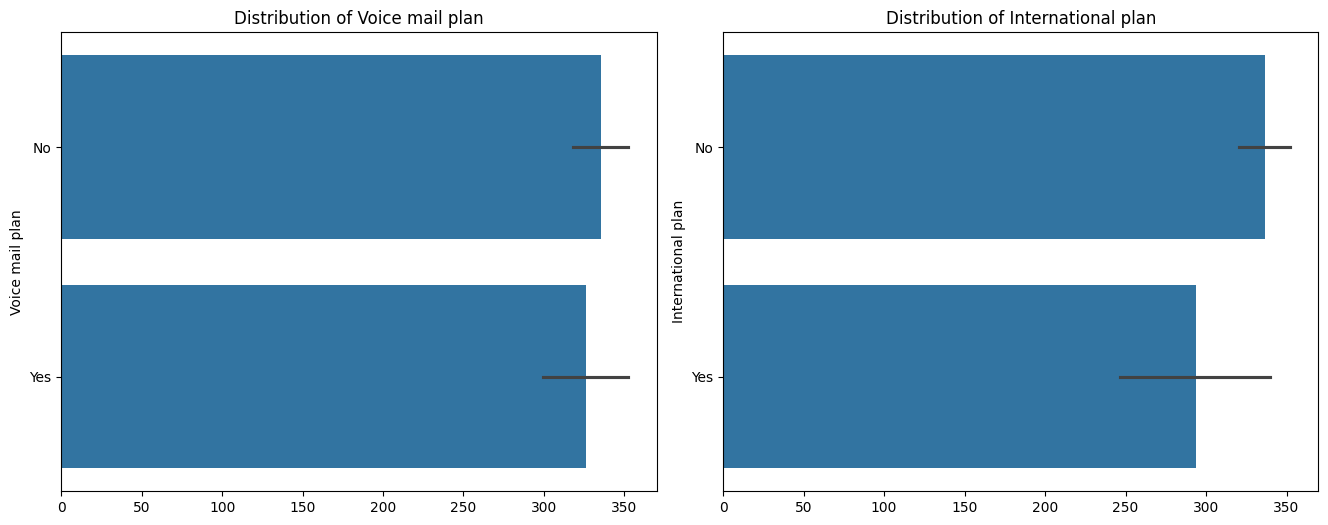

In [10]:
#Plotting all the numerical columns to see the distribution
df= CR_data[['Voice mail plan','International plan']]
#ploting distribution for numeric features
cols = 3
rows = int(np.ceil(len(numeric_features) / cols))
plt.figure(figsize=(20,  5*rows))
for e,i in enumerate(df):
  plt.subplot(rows,cols,e+1)
  sns.barplot(CR_data[i])
  plt.title(f'Distribution of {i}')
plt.tight_layout()
plt.show()

In [11]:
CR_data['Churn'].value_counts(normalize=True)

,proportion
Churn,
False,0.857571
True,0.142429


In [15]:
CR_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


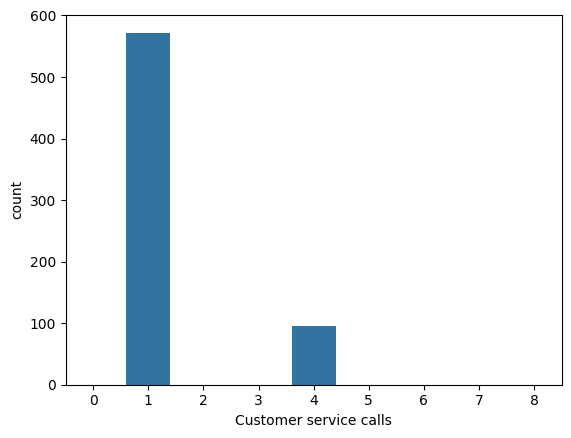

In [20]:
#plt.figure(figsize=(10,10))
sns.barplot(x=CR_data['Customer service calls'],y=CR_data['Churn'].value_counts(),data=CR_data)
plt.show()

In [12]:
result = CR_data.groupby('Churn').mean(numeric_only=True)
print(result)

       Account length   Area code  Number vmail messages  Total day minutes  \
Churn                                                                         
False      102.636364  435.695804               8.991259         175.460140   
True       104.073684  438.936842               4.894737         213.991579   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
Churn                                                                          
False       100.776224         29.828829         199.799650       100.047203   
True        101.905263         36.379053         224.764211       103.063158   

       Total eve charge  Total night minutes  Total night calls  \
Churn                                                             
False         16.983024           198.815385         100.258741   
True          19.105053           204.923158          99.242105   

       Total night charge  Total intl minutes  Total intl calls  \
Churn                     

Cheking the correlation between the variables

Account length            0.012315
Area code                 0.027129
Number vmail messages    -0.102381
Total day minutes         0.242781
Total day calls           0.019360
Total day charge          0.242777
Total eve minutes         0.175614
Total eve calls           0.055669
Total eve charge          0.175616
Total night minutes       0.042930
Total night calls        -0.017626
Total night charge        0.042958
Total intl minutes       -0.003740
Total intl calls          0.015331
Total intl charge        -0.003681
Customer service calls    0.233259
Churn                     1.000000
dtype: float64


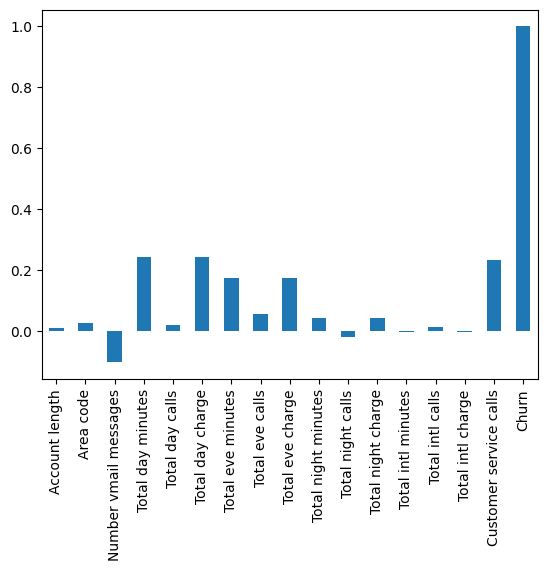

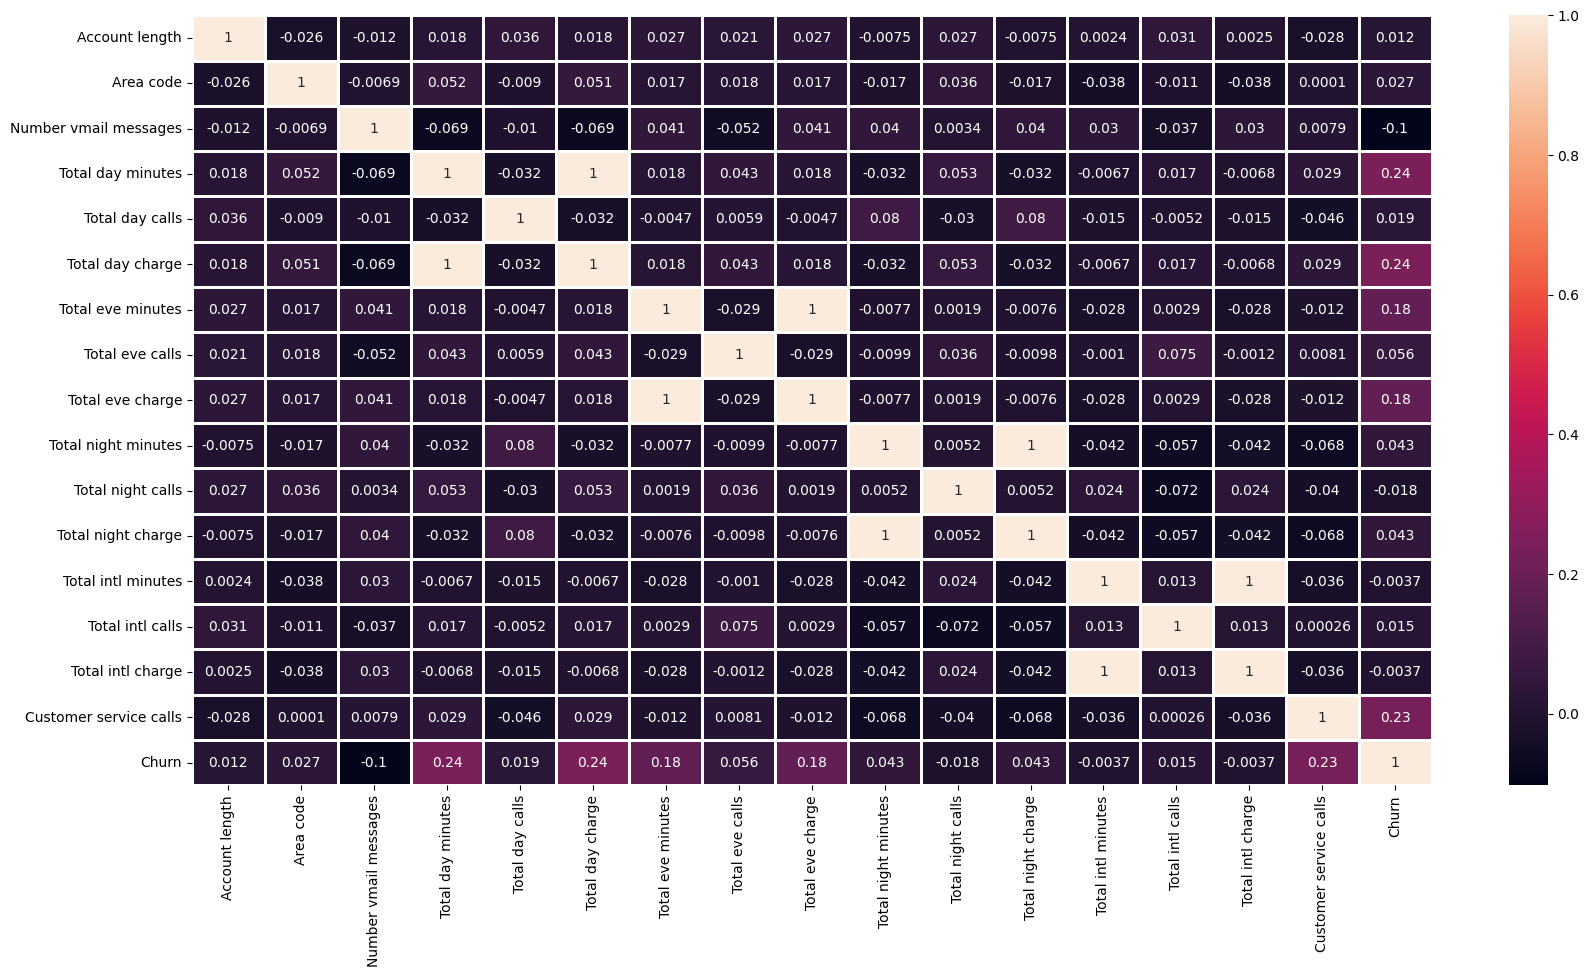

In [13]:
#Getting numeric variables
df_no=CR_data._get_numeric_data()

#Plotting correlation between numeric variables and Churn
print(df_no.corrwith(df_no['Churn']))
df_no.corrwith(df_no['Churn']).plot(kind='bar')
plt.show()

#plotting heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df_no.corr(),annot=True,linewidths=1)
plt.show()

Highly Correlated Features are : 'Total day minutes','Total day calls','Total day charge',Customer Service Calls

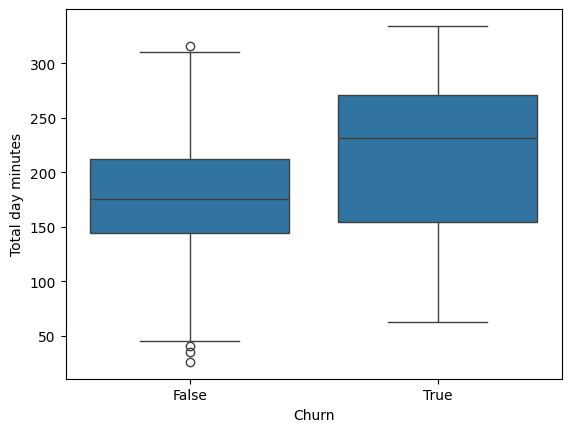

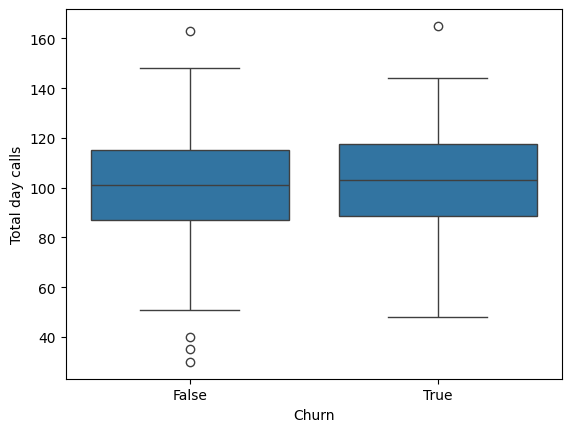

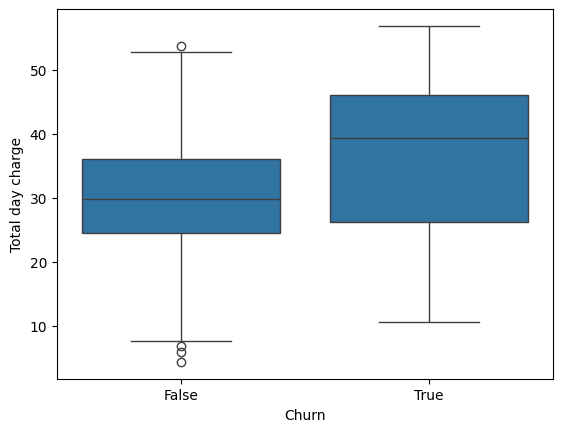

In [14]:
#Cheking outlier in the highly corelated data
df_highcorr=CR_data[['Total day minutes','Total day calls','Total day charge']]
for i in df_highcorr.columns:
  sns.boxplot(x=CR_data['Churn'],y=df_highcorr[i])
  plt.show()

Data dosent have many outliers

Handling Imbalanced data


In [19]:
# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Over sampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [17]:
CR_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [21]:
##encodig variables
x=CR_data.drop('Churn',axis=1)

y=CR_data['Churn']
LabelEncoder().fit_transform(y)

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [24]:
labelEncoderDf = x
labelEncoderColumns = labelEncoderDf.columns
for col in labelEncoderColumns :
    x[col]=LabelEncoder().fit_transform(x[col])
x.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,18,100,0,0,0,0,303,47,303,555,26,526,346,36,275,50,4,50,1
1,15,48,1,0,0,0,104,87,104,385,29,360,320,57,254,90,6,90,4
2,34,143,1,0,0,0,560,17,560,549,43,520,132,74,112,18,9,18,4
3,40,94,1,0,0,0,62,53,62,55,48,54,236,51,192,40,6,40,2
4,11,32,2,0,0,0,83,67,83,336,55,315,196,36,159,74,1,74,1


In [27]:
#Now the data is encoded lets balabce it
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((500, 19), (167, 19), (500,), (167,))

In [36]:
#Random Over sample method1
ros = RandomOverSampler(random_state=101)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)

# Check the number of records after over sampling
#print(sorted(Counter(y_train_ros).items()))

rf = RandomForestClassifier()
ros_model = rf.fit(X_train_ros, y_train_ros)
ros_prediction = ros_model.predict(X_test)
#ros_prediction = ros_prediction.astype(int)

# Check the model performance
print(classification_report(y_test, ros_prediction))

              precision    recall  f1-score   support

       False       0.93      0.96      0.94       142
        True       0.70      0.56      0.62        25

    accuracy                           0.90       167
   macro avg       0.81      0.76      0.78       167
weighted avg       0.89      0.90      0.89       167



Oversampling gave preety good recall rate, hence lets check with SMOTE method

In [32]:
# Train the random forest model
rf = RandomForestClassifier()
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)

smote_model = rf.fit(X_train_smote, y_train_smote)
smote_prediction = smote_model.predict(X_test)
smote_prediction = smote_prediction.astype(int)

# Check the model performance
print(classification_report(y_test, smote_prediction))

              precision    recall  f1-score   support

       False       0.93      0.97      0.95       142
        True       0.78      0.56      0.65        25

    accuracy                           0.91       167
   macro avg       0.85      0.77      0.80       167
weighted avg       0.90      0.91      0.90       167



In [31]:
#Random Under sample method1
ros = RandomUnderSampler(random_state=101)
X_train_rus, y_train_rus= ros.fit_resample(X_train, y_train)

# Check the number of records after over sampling
#print(sorted(Counter(y_train_ros).items()))

rf = RandomForestClassifier()
ros_model = rf.fit(X_train_rus, y_train_rus)
ros_prediction = ros_model.predict(X_test)
#ros_prediction = ros_prediction.astype(int)

# Check the model performance
print(classification_report(y_test, ros_prediction))

              precision    recall  f1-score   support

       False       0.93      0.96      0.94       142
        True       0.71      0.60      0.65        25

    accuracy                           0.90       167
   macro avg       0.82      0.78      0.80       167
weighted avg       0.90      0.90      0.90       167



In [40]:
#Feature Selection
#since the variables are numerical we use Perason correlation
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder


In [41]:
models =[LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]
def compare_models_train_test():

  for model in models:

    # training the model
    model.fit(X_train_ros, y_train_ros)

    # evaluating the model
    test_data_prediction = model.predict(X_test)

    accuracy = accuracy_score(y_test, test_data_prediction)

    print('Accuracy score of the ', model, ' = ', accuracy)
    print("\n")

compare_models_train_test()



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score of the  LogisticRegression(max_iter=1000)  =  0.7245508982035929


Accuracy score of the  SVC(kernel='linear')  =  0.718562874251497


Accuracy score of the  KNeighborsClassifier()  =  0.6526946107784432


Accuracy score of the  RandomForestClassifier()  =  0.8922155688622755




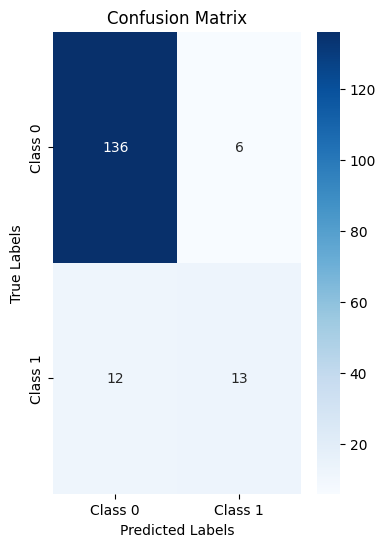

In [43]:
#Confusion Matrics
model=rf.fit(X_train_ros, y_train_ros)

 # evaluating the model
test_data_prediction = model.predict(X_test)
cm = confusion_matrix(y_test, test_data_prediction)
class_labels = ['Class 0', 'Class 1']
plt.figure(figsize=(4, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

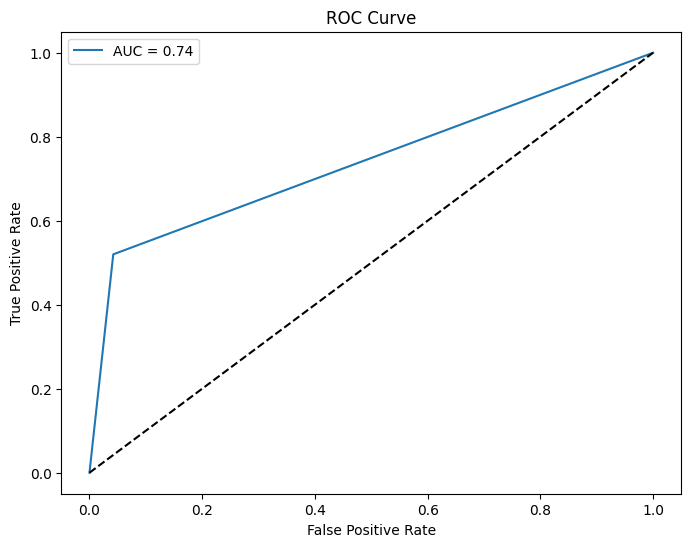

In [46]:
#Checking AUC curve as its binary classification
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, test_data_prediction)
auc = roc_auc_score(y_test, test_data_prediction)
auc
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


AUC seems preety good.
So, A U C  is a curve plotted between False Positive Rate Vs True Positive Rate at all different data points with a range of  [0, 1]. Greater the value of AUCC better the performance of the model.

